# 案例：消费信贷逾期预测
<div class="alert alert-block alert-success">
本案例研究的目标是建立一个机器学习模型——决策树，以预测贷款是否发生违约。通过特征选择和数据转换，并将各个特征可视化，期望其能帮助我们进一步理解违约的情况。最后建立决策树模型，来对违约进行分类和预测。
</div>




银行在市场经济中发挥着至关重要的作用。他们决定谁能获得融资，以什么条件获得融资。而消费信贷作为银行最重要的贷款之一，主要面对消费者，通过信用卡和小额消费贷款等方式授权银行个人客户短期获得消费资金。

因为各种恶意和非恶意的原因，会发生贷款逾期未还现象。对于银行来说，运用技术手段，如何进行预测和预警就十分重要了。

信用评分算法，利用已有的客户历史数据，对违约的概率进行猜测，是银行用来决定是否应该发放贷款的方法。

<img src="images/pexels-photo-7007174.jpeg" alt="images/pexels-photo-7007174.jpeg" width="600">

图片来自Kindel Media


本数据集基于某银行的客户信用情况数据，目标是建立模型预测两年内是否会有90天以上的债务逾期，包含250,000个样本，每个样本包含11个属性，如下表所示


属性  | 定义 
------|------
SeriousDlqin2yrs | 两年内是否有90天以上债务逾期，“1”为有，“0”为无  
RevolvingUtilizationOfUnsecuredLines  | 债务余额占总信用额度比例，除房贷、车贷等分期贷款      
age  | 年龄      
NumberOfTime30-59DaysPastDueNotWorse  | 两年内有过30到59天债务逾期的次数      
DebtRatio  | 月花销（包括债务偿还和生活费）占月收入比例      
MonthlyIncome  | 月收入  
NumberOfOpenCreditLinesAndLoans  | 贷款和信用卡的总数  
NumberOfTimes90DaysLate  | 90天以上债务逾期次数  
NumberRealEstateLoansOrLines  | 抵押贷款和房贷的总数  
NumberOfTime60-89DaysPastDueNotWorse  | 两年内有过60到89天债务逾期的次数  
NumberOfDependents  | 家庭中的受赡养人数（如配偶和孩子）  


该数据集的路径存储在对象`datasets/cs-training.csv`中，而数据集 `datasets/cs-test.csv`作为测试集，用来测试模型的表现。

完成不限于：
1. 描述信贷逾期问题的背景
1. 描述所使用数据集的变量
1. 读取数据集，查看数据集的大小
1. 对数据集进行描述性统计
1. 绘制两年内是否有过90天以上的债务逾期的分布柱状图
1. 以10岁为一个年龄段，绘制每个年龄段的收入分布情况的箱形图
1. 讨论年龄与月花销占月收入比例对债务逾期的影响
1. 绘制两年内是否有过90天以上的债务逾期用户的月收入分布图
1. 对数据进行预处理(例如缺失问题)
1. 将训练集划分为样本内(InSample)和样本外(OutOfSample)
1. 建立决策树模型，对样本内(InSample)的样本进行训练
1. 对样本外(OutOfSample)的数据集进行评估，并优化模型参数
1. 使用测试集测试模型的表现
1. 总结优点和不足

### 1.读取数据集文件
读取客户信用情况数据数据集，查看数据集的前几行。

In [1]:
import pandas as pd
df = pd.read_csv('datasets/cs-training.csv',index_col=0)
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


为了方便之后绘图和理解变量，我们将列名从英文改成中文，简化下列名。

In [2]:
EN_CN_dict = {
            'SeriousDlqin2yrs': '是否逾期',              
            'RevolvingUtilizationOfUnsecuredLines': '债务余额占总信用额度比例',              
            'age': '年龄',               
            'NumberOfTime30-59DaysPastDueNotWorse':'30到59天债务逾期的次数',
            'DebtRatio': '月花销占月收入比例',
            'MonthlyIncome': '月收入',               
            'NumberOfOpenCreditLinesAndLoans': '贷款和信用卡的总数',               
            'NumberOfTimes90DaysLate': '90天以上债务逾期次数',               
            'NumberRealEstateLoansOrLines': '抵押贷款和房贷的总数',               
            'NumberOfTime60-89DaysPastDueNotWorse':'60到89天债务逾期的次数',
            'NumberOfDependents': '家庭人数',              
            }

In [3]:
df.columns = [EN_CN_dict[i] for i in df.columns]

In [4]:
df.head(5)

,是否逾期,债务余额占总信用额度比例,年龄,30到59天债务逾期的次数,月花销占月收入比例,月收入,贷款和信用卡的总数,90天以上债务逾期次数,抵押贷款和房贷的总数,60到89天债务逾期的次数,家庭人数
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 2.对数据集进行描述性统计


In [5]:
df.describe()

,是否逾期,债务余额占总信用额度比例,年龄,30到59天债务逾期的次数,月花销占月收入比例,月收入,贷款和信用卡的总数,90天以上债务逾期次数,抵押贷款和房贷的总数,60到89天债务逾期的次数,家庭人数
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


观察以上的描述性统计表格，我们发现 债务余额占总信用额度比例 这个变量的最小值为0，最大值为50708， 我们进一步绘图来观察该变量是否存在异常值。

<Axes: >

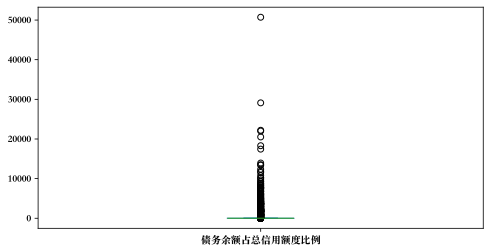

In [6]:
import matplotlib.pyplot as plt 
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 
plt.rcParams['font.sans-serif'] = 'Songti SC' 
plt.rcParams['axes.unicode_minus'] = False 
df['债务余额占总信用额度比例'].plot(kind='box', figsize=(8,4))

In [7]:
df.loc[df['债务余额占总信用额度比例']>1, '债务余额占总信用额度比例']

163          1.046279
192          1.095083
227          1.953488
252          1.048211
294       2340.000000
             ...     
149940       1.049900
149956       1.135552
149963       1.005733
149965       1.010934
149974       1.026395
Name: 债务余额占总信用额度比例, Length: 3321, dtype: float64

通过以上的方式，我们了解到共3321个样本在变量'债务余额占总信用额度比例'上存在异常值问题，我们 将其大于1的值修正为1。

In [8]:
df.loc[df['债务余额占总信用额度比例']>1, '债务余额占总信用额度比例'] = 1

接着，我们观察到变量 月花销占月收入比例 的数值也存在异常值的问题，我们对其进行修正，先将大于1的
值改为nan，再填充成均值。

In [9]:
import numpy as np
df.loc[df['月花销占月收入比例']>1, '月花销占月收入比例'] = np.nan

In [10]:
df['月花销占月收入比例'] = df['月花销占月收入比例'].fillna(df['月花销占月收入比例'].mean())

### 3.绘制两年内是否有过90天以上的债务逾期的分布柱状图


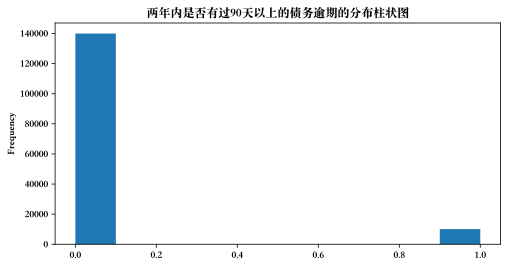

In [11]:
fig = df['是否逾期'].plot(kind='hist', title='两年内是否有过90天以上的债务逾期的分布柱状图',
                       figsize=(8,4))

观察以上图片，我们发现样本在我们分类目标(当然也是预测目标) 两年内是否有过90天以上的债务逾期 上不 均衡，值为0的样本约为14万个，值为1的样本约为1万个。这是典型的分类不均衡的案例。


### 4.以10岁为一个年龄段，讨论每个年龄段的是否违约情况


<Axes: >

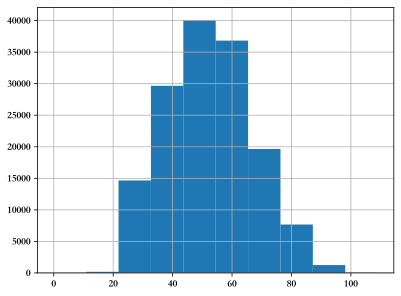

In [12]:
df['年龄'].hist()

首先构建年龄段, 10-20, 20-30, 30-40, 40-50 ...，以10岁为一个年龄段，来绘制不同年龄段下的是否违约 的饼状图

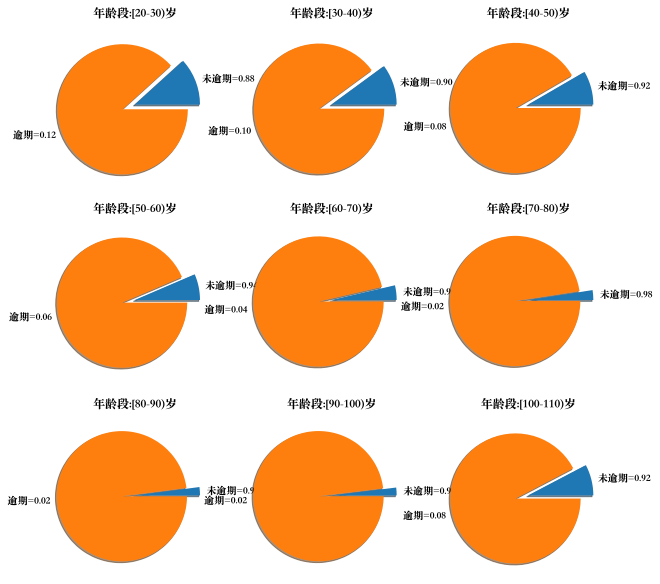

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))          #跳到下一个子图
ax = ax.flatten()                                                  #子图的2维序号变成1维序号，坐标轴ax

index = 0
for i in range(20, 110, 10):
    age_df = df.loc[np.logical_and(df['年龄']>=i, df['年龄']<i+10)] # 对年龄进行分段
    yes = (age_df['是否逾期'] == 1).sum()/len(age_df)               # 在某个年龄段内统计逾期和未逾期的比例
    no = (age_df['是否逾期'] == 0).sum()/len(age_df)
    ax[index].pie([yes, no],                                       #坐标轴ax[index]绘制饼状图
                  labels=['未逾期=%.2f' %no, '逾期=%.2f' %yes],      #标签
                  explode=[0, 0.2],                                    
                  shadow=True)                                     #阴影
    ax[index].set_title('年龄段:[%s-%s)岁' %(i, i+10))              #标题
    index += 1                                                     #跳到下一个子图
    
     

### 5.讨论月花销占月收入比例对债务逾期的影响

将月花销占比月收入 这个连续型变量变成离散的，使用分段的方法，分成1-5个等级。 假说:等级越低，代表经济状况越差，其申请贷款，逾期的可能性就越高。

### 6.绘制两年内是否有过90天以上的债务逾期用户的月收入分布图

### 7.对数据进行预处理(例如缺失问题)


我们直接使用平均值对于缺失的变量进行填充。

In [14]:
 df = df.fillna(df.mean())

### 8.将训练集划分为样本内(InSample)和样本外(OutOfSample)


In [15]:
X = df[['债务余额占总信用额度比例', '年龄', '30到59天债务逾期的次数', '月花销占月收入比例',
        '月收入','贷款和信用卡的总数', '90天以上债务逾期次数', '抵押贷款和房贷的总数',
        '60到89天债务逾期的次数', '家庭人数']]
y = df['是否逾期']

In [16]:
from sklearn.model_selection import train_test_split
is_x, oos_x, is_y, oos_y = train_test_split(X, y, train_size=0.8,random_state=42)

### 9.建立决策树模型，对样本内(InSample)的样本进行训练


In [17]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3, splitter='best')
model.fit(is_x, is_y)

DecisionTreeClassifier(max_depth=3)

In [18]:
model.score(is_x, is_y)

0.9354833333333333

In [19]:
is_x.columns.values

array(['债务余额占总信用额度比例', '年龄', '30到59天债务逾期的次数', '月花销占月收入比例', '月收入',
       '贷款和信用卡的总数', '90天以上债务逾期次数', '抵押贷款和房贷的总数', '60到89天债务逾期的次数', '家庭人数'],
      dtype=object)

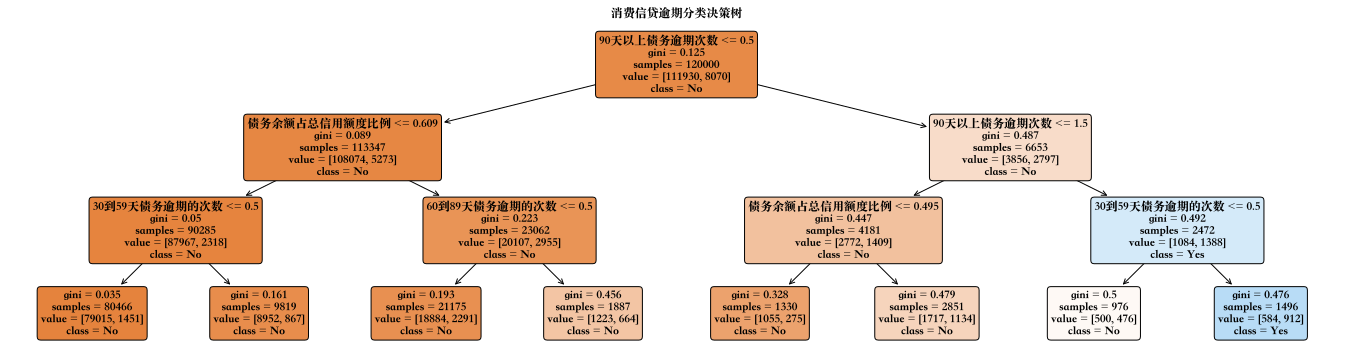

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,6))
plot_tree(model,
          max_depth=3,
         class_names=['No', 'Yes'],
         feature_names=is_x.columns.to_list(),
          rounded=True,
          fontsize=12,
         filled=True)
plt.title('消费信贷逾期分类决策树') 
plt.show()

### 10. 对样本外(OutOfSample)的数据集进行评估，并优化模型参数


In [21]:
model.score(oos_x, oos_y)

0.9365

### 11. 使用测试集测试模型的表现


### 12. 总结优点和不足